# Fake News Detection And Classification Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


Reading Dataset

In [2]:
fake = pd.read_csv("C:/Users/Umesh/Desktop/Fake.csv")
true = pd.read_csv("C:/Users/Umesh/Desktop/True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

Data Cleaning And Preparation

In [5]:
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
data.head()

,title,text,subject,date,target
0,Arnold Schwarzenegger HAMMERS Trump For Claim...,Donald Trump just got terminated again by Arno...,News,"March 4, 2017",fake
1,South Korea fears further missile advances by ...,SEOUL (Reuters) - North Korea may conduct addi...,worldnews,"November 20, 2017",true
2,U.S. House to vote on non-nuclear Iran sanctio...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"October 20, 2017",true
3,BERNIE’S WORLD: SOCIALISM Forces Venezuelans t...,Take a good hard look America this is Bernie s...,Government News,"May 10, 2016",fake
4,Trump has not offered Carson U.S. housing post...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"November 23, 2016",true


In [9]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Arnold Schwarzenegger HAMMERS Trump For Claim...,Donald Trump just got terminated again by Arno...,News,fake
1,South Korea fears further missile advances by ...,SEOUL (Reuters) - North Korea may conduct addi...,worldnews,true
2,U.S. House to vote on non-nuclear Iran sanctio...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,true
3,BERNIE’S WORLD: SOCIALISM Forces Venezuelans t...,Take a good hard look America this is Bernie s...,Government News,fake
4,Trump has not offered Carson U.S. housing post...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,true


In [10]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Donald Trump just got terminated again by Arno...,News,fake
1,SEOUL (Reuters) - North Korea may conduct addi...,worldnews,true
2,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,true
3,Take a good hard look America this is Bernie s...,Government News,fake
4,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,true


In [11]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,donald trump just got terminated again by arno...,News,fake
1,seoul (reuters) - north korea may conduct addi...,worldnews,true
2,washington (reuters) - the u.s. house of repre...,politicsNews,true
3,take a good hard look america this is bernie s...,Government News,fake
4,washington (reuters) - president-elect donald ...,politicsNews,true


In [12]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
data.head()

,text,subject,target
0,donald trump just got terminated again by arno...,News,fake
1,seoul reuters north korea may conduct additio...,worldnews,true
2,washington reuters the us house of representa...,politicsNews,true
3,take a good hard look america this is bernie s...,Government News,fake
4,washington reuters presidentelect donald trum...,politicsNews,true


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Umesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,target
0,donald trump got terminated arnold schwarzeneg...,News,fake
1,seoul reuters north korea may conduct addition...,worldnews,true
2,washington reuters us house representatives vo...,politicsNews,true
3,take good hard look america bernie utopia econ...,Government News,fake
4,washington reuters presidentelect donald trump...,politicsNews,true


Basic Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


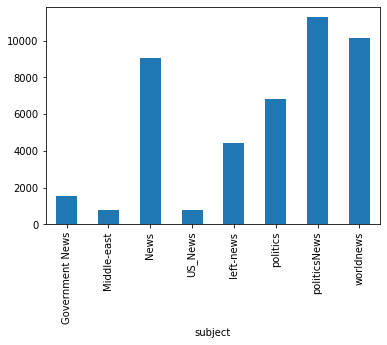

In [16]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


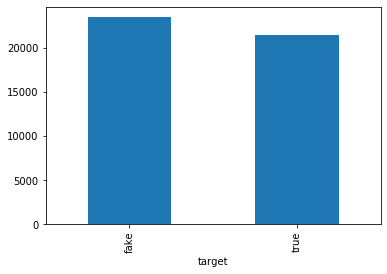

In [17]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [18]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

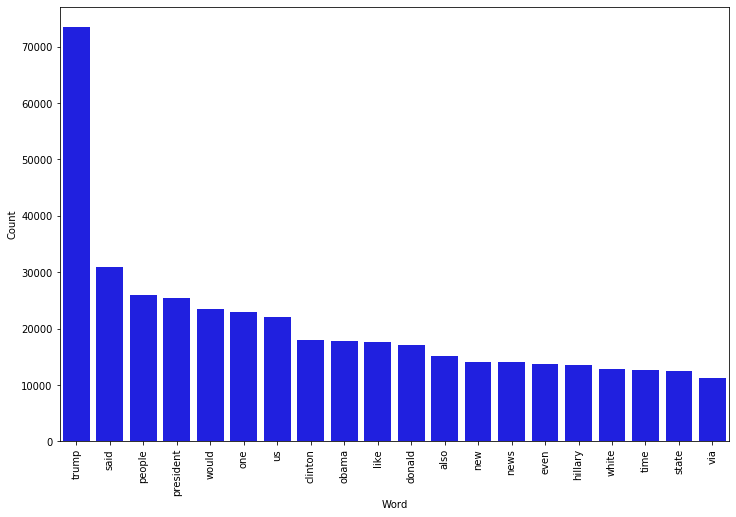

In [19]:
counter(data[data["target"] == "fake"], "text", 20)

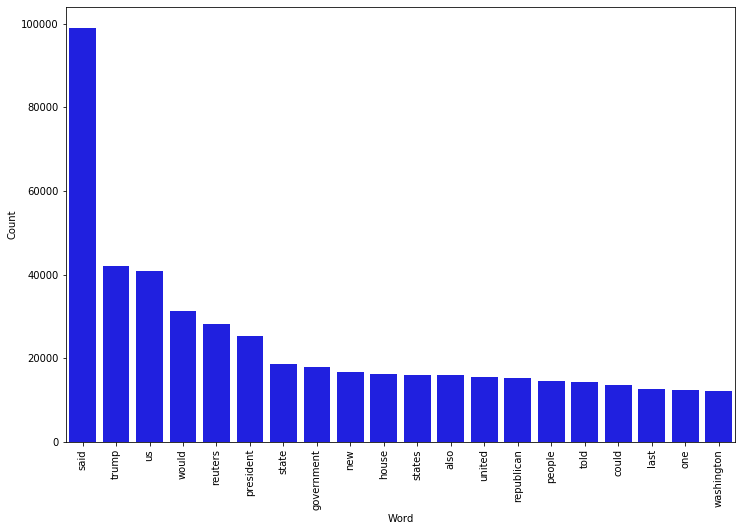

In [20]:
counter(data[data["target"] == "true"], "text", 20)

Modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Peparing The Data

In [22]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Logistic Regression

In [24]:
dct = dict()
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

C:\Users\Umesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 98.75%


Confusion matrix, without normalization


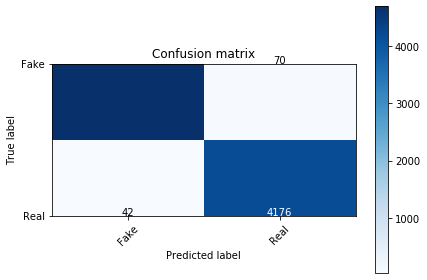

In [25]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.55%


Confusion matrix, without normalization


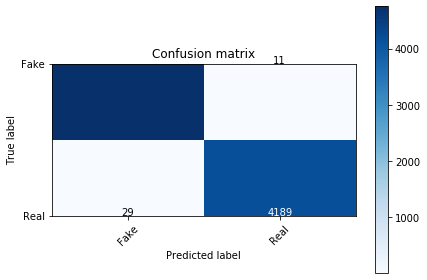

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.85%


Confusion matrix, without normalization


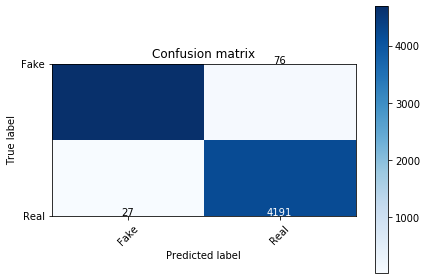

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# SVM

In [31]:
from sklearn import svm

#Create a svm Classifier 
clf = svm.SVC(kernel='linear')

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.44%


# Comparision

([<matplotlib.axis.YTick at 0x1aa4d5a8d48>,
 <a list of 10 Text yticklabel objects>)

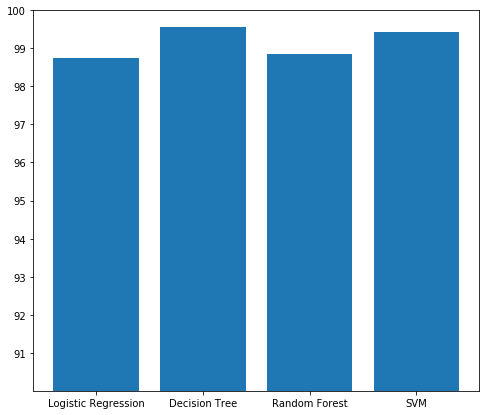

In [32]:
 import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

# Test The News 

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectrorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)